<a href="https://colab.research.google.com/github/Aisyhnabilaaa/F55122027-Aisyah-Nabila-Rahmawati/blob/main/F55122027_AISYAH_NABILA_RAHMAWATI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import cv2
import numpy as np
from PIL import Image, ImageOps
import random
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

In [44]:
# URL gambar
image_url = "/content/PLAT NOMOR.jpeg"

# Baca gambar menggunakan OpenCV
image_opencv = cv2.imread(image_url)

# Baca gambar menggunakan PIL
image_pil = Image.open(image_url)

In [58]:
# Convert the image to grayscale
image_gray = cv2.cvtColor(image_opencv, cv2.COLOR_BGR2GRAY)

# Apply Sobel operator
sobelx = cv2.Sobel(image_gray, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(image_gray, cv2.CV_64F, 0, 1, ksize=3)

# Combine the results
sobel_combined = cv2.addWeighted(cv2.convertScaleAbs(sobelx), 0.5, cv2.convertScaleAbs(sobely), 0.5, 0)

In [46]:
canny = cv2.Canny(cv2.cvtColor(image_opencv, cv2.COLOR_BGR2GRAY), 100, 200)


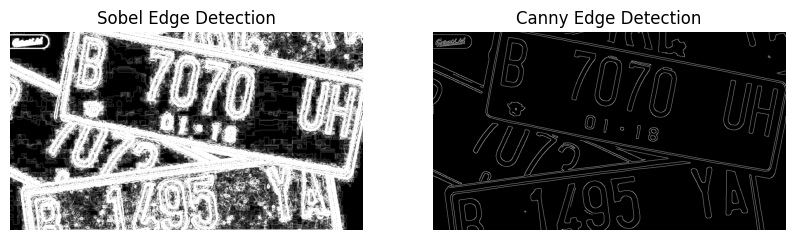

In [47]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(sobel_combined, cmap='gray')
axes[0].set_title('Sobel Edge Detection')
axes[0].axis('off')
axes[1].imshow(canny, cmap='gray')
axes[1].set_title('Canny Edge Detection')
axes[1].axis('off')
plt.show()

Random Cropping (OpenCV)


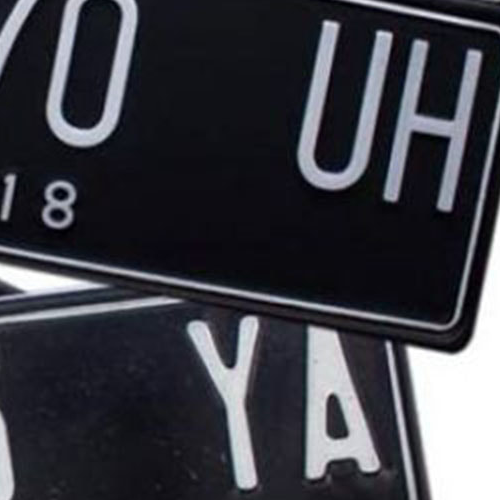

Half-size Center Cropping (OpenCV)


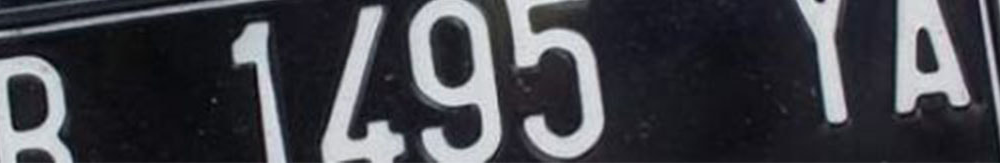

In [85]:
# Random Cropping
height, width = image_opencv.shape[:2]
x = random.randint(0, width - 500)
y = random.randint(0, height - 500)
random_crop_opencv = image_opencv[y:y+500, x:x+500]
random_crop_pil = image_pil.crop((x, y, x+500, y+500))

# Half-size Center Cropping
center_x, center_y = width // 2, height // 2
half_size_crop_opencv = image_opencv[center_y-500:center_y+500, center_x-500:center_x+500]
half_size_crop_pil = image_pil.crop((center_x-500, center_y-500, center_x+500, center_y+500))

# Menampilkan hasil Cropping
# Random Cropping
print("Random Cropping (OpenCV)")
cv2_imshow(random_crop_opencv)

# Half-size Center Cropping
print("Half-size Center Cropping (OpenCV)")
cv2_imshow(half_size_crop_opencv)


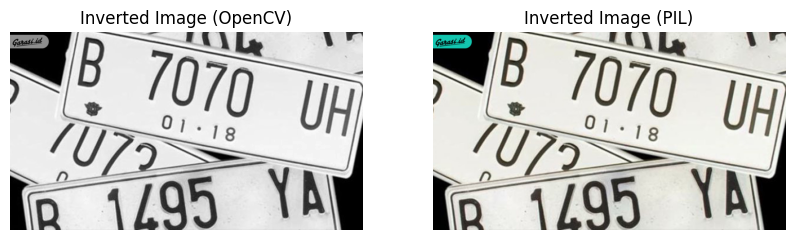

In [54]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(inverted_image_opencv, cmap='gray')
axes[0].set_title('Inverted Image (OpenCV)')
axes[0].axis('off')
axes[1].imshow(inverted_image_pil, cmap='gray')
axes[1].set_title('Inverted Image (PIL)')
axes[1].axis('off')
plt.show()

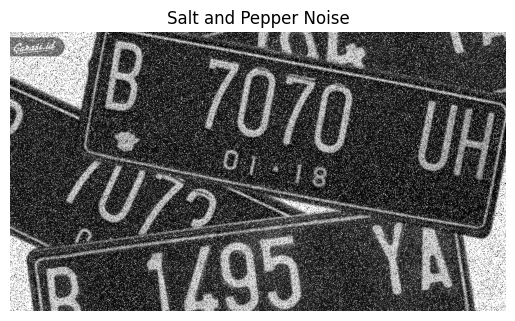

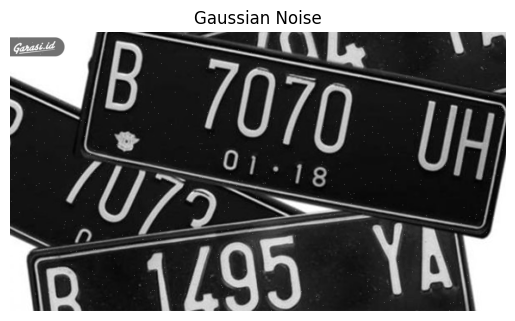

In [69]:
# Tambahkan Salt and Pepper Noise pada gambar grayscale:
salt_pepper_noise = np.zeros(image_gray.shape, np.uint8)
cv2.randu(salt_pepper_noise, 0, 255)

black_pixels = salt_pepper_noise < 30
white_pixels = salt_pepper_noise > 225

image_salt_pepper = image_gray.copy()
image_salt_pepper[black_pixels] = 0
image_salt_pepper[white_pixels] = 255

plt.imshow(image_salt_pepper, cmap='gray')
plt.axis('off')
plt.title('Salt and Pepper Noise')
plt.show()

# Tambahkan Gaussian Noise:
mean = 0
var = 0.1
sigma = var ** 0.5
gaussian = np.random.normal(mean, sigma, image_gray.shape)
gaussian = gaussian.reshape(image_gray.shape).astype('uint8')

image_gaussian = cv2.add(image_gray, gaussian)

plt.imshow(image_gaussian, cmap='gray')
plt.axis('off')
plt.title('Gaussian Noise')
plt.show()

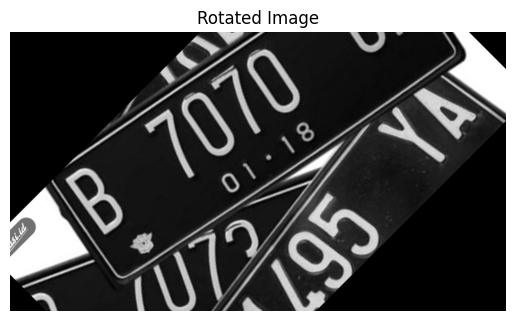

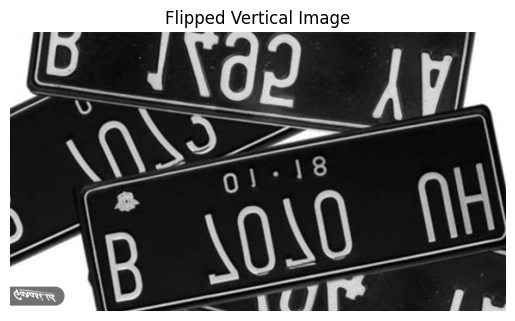

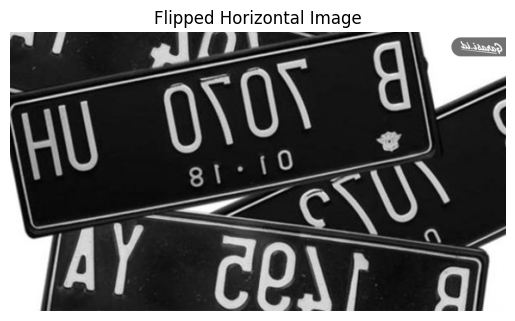

In [70]:
# Transformasi Geometri: Rotasi
rows, cols = image_gray.shape
M = cv2.getRotationMatrix2D((cols/2, rows/2), 45, 1)  # Rotasi 45 derajat
rotated_image = cv2.warpAffine(image_gray, M, (cols, rows))

plt.imshow(rotated_image, cmap='gray')
plt.axis('off')
plt.title('Rotated Image')
plt.show()

# Transformasi Geometri: Flip Vertikal
flipped_vertical = cv2.flip(image_gray, 0)

plt.imshow(flipped_vertical, cmap='gray')
plt.axis('off')
plt.title('Flipped Vertical Image')
plt.show()

# Transformasi Geometri: Flip Horizontal
flipped_horizontal = cv2.flip(image_gray, 1)

plt.imshow(flipped_horizontal, cmap='gray')
plt.axis('off')
plt.title('Flipped Horizontal Image')
plt.show()